# BLOC 5 - GETAROUND

### Delay

In [1]:
#!pip install plotly -q

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

In [3]:
# Loading the dataset 
data_delay = pd.read_excel("get_around_delay_analysis.xlsx")
data_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,Unnamed: 7,Unnamed: 8
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN


In [4]:
data_delay.previous_ended_rental_id.unique()

array([    nan, 563782., 545639., ..., 567121., 545045., 573429.])

In [5]:
data_delay.checkin_type.unique()

array(['mobile', 'connect'], dtype=object)

In [6]:
# Counting the number of car 
number_of_car = len(set(data_delay['car_id']))
number_of_car

8143

In [7]:
data_delay.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [8]:
data_delay["Unnamed: 7"].unique()

array([nan])

In [9]:
data_delay["Unnamed: 8"].unique()

array([nan])

In [10]:
# Unnamed: 7 et 8 only have null values, so i create a new df without them
df_delay = data_delay[['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes']]

In [11]:
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [12]:
data_delay.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,Unnamed: 7,Unnamed: 8
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000,0.0,0.0
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430,NaN,NaN
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486,NaN,NaN
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000,NaN,NaN
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000,NaN,NaN
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000,NaN,NaN
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000,NaN,NaN
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000,NaN,NaN


In [13]:
data_delay.shape

(21310, 9)

In [14]:
# Checking missing values
data_delay.isna().sum()/data_delay.shape[0]*100

rental_id                                       0.000000
car_id                                          0.000000
checkin_type                                    0.000000
state                                           0.000000
delay_at_checkout_in_minutes                   23.294228
previous_ended_rental_id                       91.360863
time_delta_with_previous_rental_in_minutes     91.360863
Unnamed: 7                                    100.000000
Unnamed: 8                                    100.000000
dtype: float64

In [15]:
# Create a new column for classification delay or not delay
df_delay['is_delay'] = df_delay.delay_at_checkout_in_minutes.apply(lambda x : "Yes" if x>=0 else "no")

<ipython-input-15-efabed829e42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['is_delay'] = df_delay.delay_at_checkout_in_minutes.apply(lambda x : "Yes" if x>=0 else "no")


In [16]:
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,is_delay
0,505000,363965,mobile,canceled,NaN,NaN,NaN,no
1,507750,269550,mobile,ended,-81.0,NaN,NaN,no
2,508131,359049,connect,ended,70.0,NaN,NaN,Yes
3,508865,299063,connect,canceled,NaN,NaN,NaN,no
4,511440,313932,mobile,ended,NaN,NaN,NaN,no


In [17]:
df_delay.is_delay.value_counts()

no     11784
Yes     9526
Name: is_delay, dtype: int64

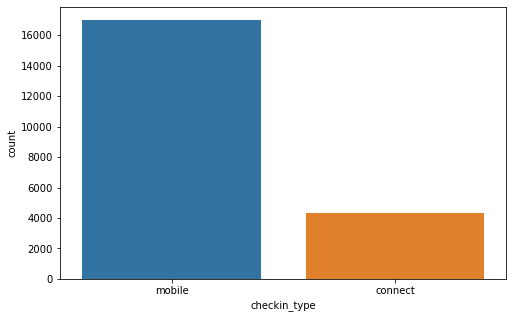

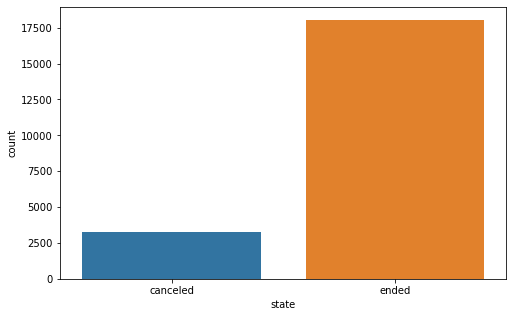

In [18]:
for col in data_delay.select_dtypes('object'):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data_delay, x=col)

In [19]:
fig = px.pie(df_delay, 'is_delay', title="Percentage of delay")
fig.show()

In [20]:
fig = px.pie(df_delay, 'state', title="Percentage of state, ended or canceled")
fig.show()

In [21]:
fig = px.pie(df_delay, 'checkin_type', title="Percentage of checking by mobile or connect")
fig.show()

In [22]:
fig = px.histogram(df_delay, x = 'checkin_type',
                    color = 'is_delay',
                    text_auto = '.0f',
                    barmode = 'group',
                    title = 'delay by checkin type')
fig.show()

In [23]:
fig = px.histogram(df_delay[df_delay['delay_at_checkout_in_minutes']>0],
                    x ='delay_at_checkout_in_minutes',
                    range_x = [0,720],
                    nbins=7200
                    )
fig.show()

In [24]:
df_delay.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,is_delay
0,505000,363965,mobile,canceled,NaN,NaN,NaN,no
1,507750,269550,mobile,ended,-81.0,NaN,NaN,no
2,508131,359049,connect,ended,70.0,NaN,NaN,Yes
3,508865,299063,connect,canceled,NaN,NaN,NaN,no
4,511440,313932,mobile,ended,NaN,NaN,NaN,no


In [25]:
dataset_late = data_delay[data_delay['delay_at_checkout_in_minutes'] > 0] # Watch car with delay 
dataset_late = dataset_late[dataset_late['delay_at_checkout_in_minutes'] < 240] # more than 4hours is an outlier
fig = px.histogram(dataset_late, 'delay_at_checkout_in_minutes', color = 'checkin_type')
fig.show()

In [26]:
dataset_early = data_delay[data_delay['delay_at_checkout_in_minutes'] < 0] # Watch cars that arrived early 
dataset_early = dataset_early[dataset_early['delay_at_checkout_in_minutes'] > -240]
fig = px.histogram(dataset_early, 'delay_at_checkout_in_minutes', color = 'checkin_type')
fig.show()

In [27]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

values_early = dataset_early.groupby('checkin_type')['delay_at_checkout_in_minutes'].sum().abs()
print(values_early)
values_lates = dataset_late.groupby('checkin_type')['delay_at_checkout_in_minutes'].sum()
print(values_lates)

fig.add_trace(go.Pie(labels=values_early.keys(), values=values_early, name="Early"),
              1, 1)
fig.add_trace(go.Pie(labels=values_lates.keys(), values=values_lates, name="With Delay"),
             1, 2)

fig.update_layout(
    title_text="Percentage of delay or early check out for mobile and connect",
    # Add "early" and "late" in the middle
    annotations=[dict(text='Early', x=0.20, y=1.1, font_size=20, showarrow=False),
                 dict(text='Delay', x=0.80, y=1.1, font_size=20, showarrow=False)])
fig.show()

checkin_type
connect    109682.0
mobile     251560.0
Name: delay_at_checkout_in_minutes, dtype: float64
checkin_type
connect     76497.0
mobile     401309.0
Name: delay_at_checkout_in_minutes, dtype: float64


In [28]:
## Percentage of car ready or unvailable and after how long
specs = np.repeat({'type':'domain'}, 5).tolist()

fig = make_subplots(rows=1, cols=5, specs=[specs])

for hours_cut in range(0,5):

    dataset_before = len( data_delay[data_delay['delay_at_checkout_in_minutes'] < (hours_cut*60)] )
    dataset_after = len( data_delay[data_delay['delay_at_checkout_in_minutes'] >= (hours_cut*60)] )


    fig.add_trace(go.Pie(labels=['Ready', 'Unvailable'], 
                         values=[dataset_before, dataset_after], 
                         name=f"{hours_cut} hour(s) between ck_in & check out"),
                         1, (hours_cut+1) )

fig.update_layout(
    title_text="Cars available between check in and check out after a delay of ...",
    annotations=[dict(text='Without', x=0.05, y=1.05, font_size=20, showarrow=False),
                 dict(text='After 1 hour', x=0.24, y=1.05, font_size=20, showarrow=False),
                 dict(text='After 2 hours', x=0.50, y=1.05, font_size=20, showarrow=False),
                 dict(text='After 3 hours', x=0.76, y=1.05, font_size=20, showarrow=False),
                 dict(text='After 4 hours', x=0.97, y=1.05, font_size=20, showarrow=False),
                ])
fig.show()